In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Q2

In [7]:
def h(x, theta, offset):
    result = x[0] * theta[0] + x[1] * theta[1] + offset
    if result >= 0:
        return 1.0
    else:
        return -1.0

In [8]:
def perceptron_train(max_iter, filename):
    data = open(filename, "r").readlines()
    theta = (0,0)
    offset = 0
    
    for i in range(max_iter):
        for line in data:
            # process each line of data
            temp = line.split(",")
            symmetry, intensity, y = float(temp[0]), float(temp[1]), float(temp[2])
            
            # determine predicted sign and compare with label
            x = (symmetry, intensity)
            sign = h(x, theta, offset)
            if y != sign:
                theta = (theta[0] + x[0] * y, theta[1] + x[1] * y)
                offset += y
    
    return theta, offset

In [9]:
def perceptron_test(theta, offset, filename):
    errors = 0
    total = 0
    
    for line in open(filename, "r").readlines():
        # process each line of data
        temp = line.split(",")
        symmetry, intensity, actual = float(temp[0]), float(temp[1]), float(temp[2])

        # determine predicted sign and compare with label
        x = (symmetry, intensity)
        predicted = h(x, theta, offset)
        if actual != predicted:
            errors += 1
        total += 1
    
    return (total - errors) / total * 100

### (a)

In [10]:
train_file = "HW1_data (Spring2023)/2/train_1_5.csv"
test_file = "HW1_data (Spring2023)/2/test_1_5.csv"
theta, offset = perceptron_train(1, train_file)
accuracy = perceptron_test(theta, offset, test_file)
print(f"Theta: {theta}")
print(f"Offset: {offset}")
print(f"Accuracy: {accuracy}")      

Theta: (-2.1296489707053077, -5.110770367313215)
Offset: 0.0
Accuracy: 98.39034205231388


### (b)

In [11]:
train_file = "HW1_data (Spring2023)/2/train_1_5.csv"
test_file = "HW1_data (Spring2023)/2/test_1_5.csv"
theta, offset = perceptron_train(5, train_file)
accuracy = perceptron_test(theta, offset, test_file)
print(f"Theta: {theta}")
print(f"Offset: {offset}")
print(f"Accuracy: {accuracy}")  

Theta: (-0.6783897608801368, -9.99537055170137)
Offset: 2.0
Accuracy: 97.98792756539235


# Q3

In [12]:
def load_data(input_file, output_file):
    x, x_raw, y = [], [], []
    for line in open(input_file, "r").readlines():
        temp = line.strip().split("e")
        if len(temp) == 2:
            input_val = float(temp[0]) * 10**(float(temp[1]))
            x.append((input_val, 1))
            x_raw.append(input_val)
    
    for line in open(output_file, "r").readlines():
        temp = line.strip().split("e")
        if len(temp) == 2:
            y.append(float(temp[0]) * 10**(float(temp[1])))
    
    return np.array(x), np.array(y), x_raw

In [13]:
def closed_linear_regression(x, y):
    n = y.size
    b = x.transpose() @ y / n
    A = x.transpose() @ x / n
    return np.linalg.inv(A) @ b

In [14]:
def training_error(x, y, theta):
    R = 0
    n = y.size
    for i in range(n):
        R += (y[i] - theta @ x[i]) ** 2 / 2
    return R / n

In [15]:
def plot(x, y, theta, d, x_min, x_max, title):
    # Set up the graph
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # Plot scatter plot of raw data
    ax.scatter(x, y)

    # Plot regression line
    xseq = np.linspace(x_min, x_max, num=100)
    yseq = np.linspace(0, 0, num=100)
    for i in range(d + 1):
        yseq += xseq ** (d - i) * theta[i]
    ax.plot(xseq, yseq, color = "red")

### (a)

Theta: [1.78157138 3.2447227 ]
Training error: 0.5812605752543938


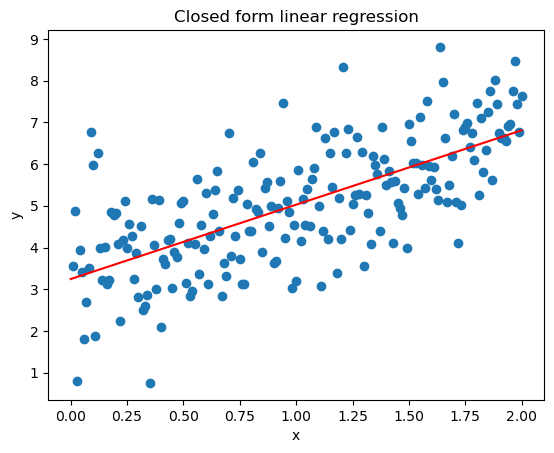

In [16]:
# Calculate theta and offset
x, y, x_raw = load_data("HW1_data (Spring2023)/3/hw1x.dat", "HW1_data (Spring2023)/3/hw1y.dat")
theta = closed_linear_regression(x, y)
print(f"Theta: {theta}")

# Calculate training error
error = training_error(x, y, theta)
print(f"Training error: {error}")

# Plot the graphs
plot(x_raw, y, theta, 1, 0, 2, "Closed form linear regression")

### (b)

In [17]:
# algorithm based off of the description here:
# https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a
def batch_gd(x, y, eta, epochs):
    theta = [0, 0]
    min_theta = theta
    min_error = training_error(x, y, theta)
    n = len(y)
    
    for i in range(epochs):
        gradient_sum = 0
        for j in range(n):
            gradient_sum += (y[j] - theta @ x[j]) * x[j]
        
        # update theta and error
        theta += eta * gradient_sum / n
        error = training_error(x, y, theta)
        if error < min_error:
            min_theta = theta
            min_error = error
        
    return min_theta, min_error

In [18]:
def stochastic_gd(x, y, eta, epochs):
    theta = [0, 0]
    min_theta = theta
    min_error = training_error(x, y, theta)
    n = len(y)
    rng = np.random.default_rng()
    
    for i in range(epochs):
        shuffled_idx = rng.permutation(n * 5)
        
    for j in shuffled_idx:
        while j >= n:
            j -= n
        theta += eta * (y[j] - theta @ x[j]) * x[j]
        error = training_error(x, y, theta)
        if error < min_error:
            min_theta = theta
            min_error = error
    
    return min_theta, min_error

Batch gradient descent
Theta: [0.13822604 0.12322976]
Error: 12.422373711732241

Stochastic gradient descent
Theta: [2.16727972 2.7726939 ]
Error: 0.6089546181190526


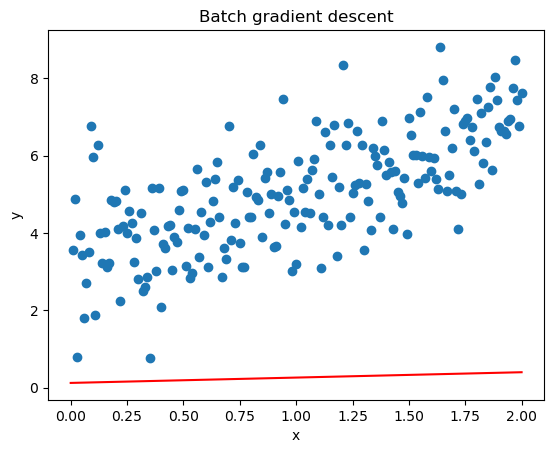

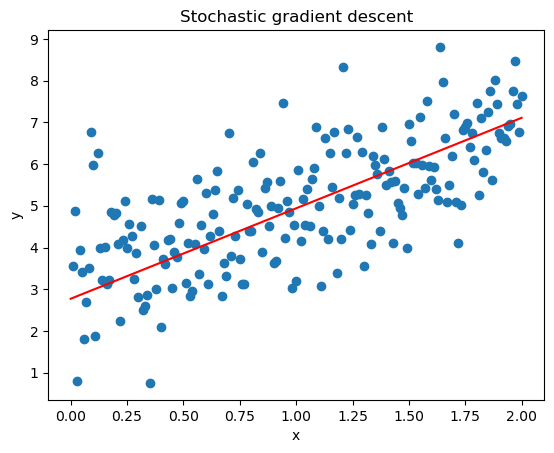

In [19]:
x, y, x_raw = load_data("HW1_data (Spring2023)/3/hw1x.dat", "HW1_data (Spring2023)/3/hw1y.dat")

# Train with batch gradient descent
print("Batch gradient descent")
theta, error = batch_gd(x, y, 0.005, 5)
print(f"Theta: {theta}")
print(f"Error: {error}")

plot(x_raw, y, theta, 1, 0, 2, "Batch gradient descent")

# Train with stochastic gradient descent
print("\nStochastic gradient descent")
theta, error = stochastic_gd(x, y, 0.005, 5)
print(f"Theta: {theta}")
print(f"Error: {error}")

plot(x_raw, y, theta, 1, 0, 2, "Stochastic gradient descent")

### (c)

In [20]:
def PolyRegress(x_raw, y, d):
    x = []
    for i in range(len(x_raw)):
        temp = []
        for j in range(d + 1):
            temp.append(x_raw[i] ** (d - j))
        x.append(temp)
    x_d = np.array(x)
    return closed_linear_regression(x_d, y), x_d

Polynomial regression with d = 2
Training error: 0.5703016121648222

Polynomial regression with d = 3
Training error: 0.570084436469135

Polynomial regression with d = 4
Training error: 0.564616387928643

Polynomial regression with d = 5
Training error: 0.5638968184749199

Polynomial regression with d = 6
Training error: 0.5613433038902946

Polynomial regression with d = 7
Training error: 0.5562352515818987

Polynomial regression with d = 8
Training error: 0.5537805799168815

Polynomial regression with d = 9
Training error: 0.5529231102449522

Polynomial regression with d = 10
Training error: 0.5525924650525031

Polynomial regression with d = 11
Training error: 0.6302161477299759

Polynomial regression with d = 12
Training error: 29.170368010315926

Polynomial regression with d = 13
Training error: 3.626046096761728

Polynomial regression with d = 14
Training error: 3.267582585897602

Polynomial regression with d = 15
Training error: 18.868793374224563



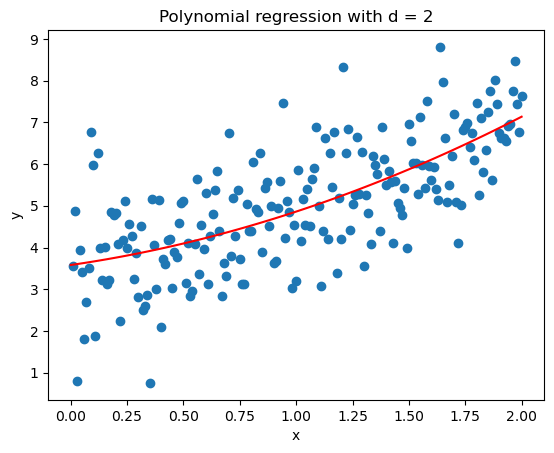

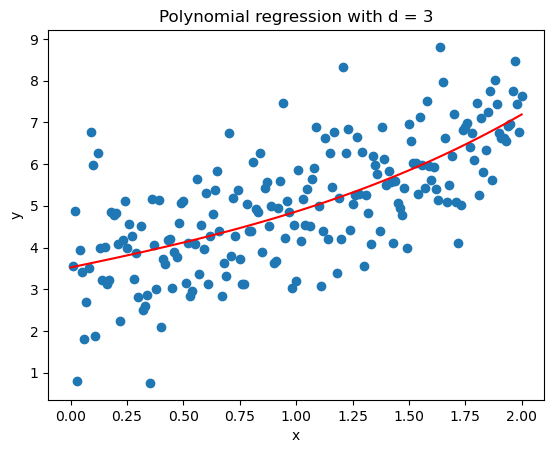

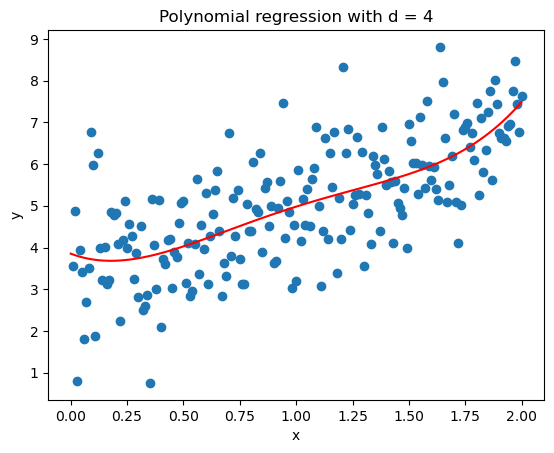

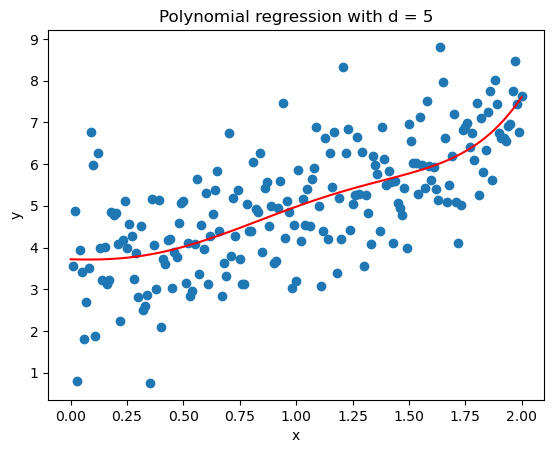

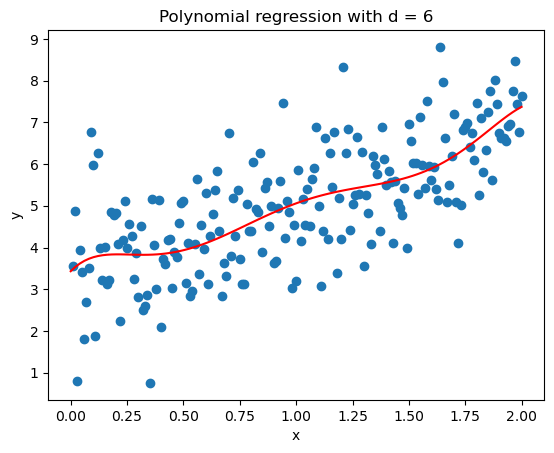

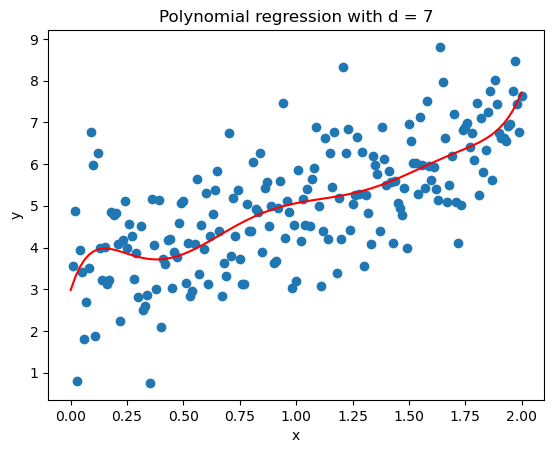

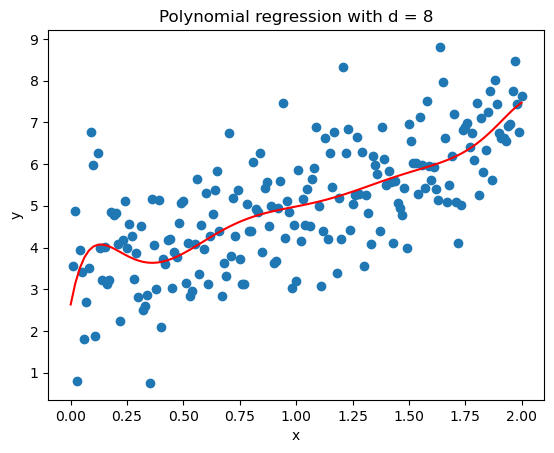

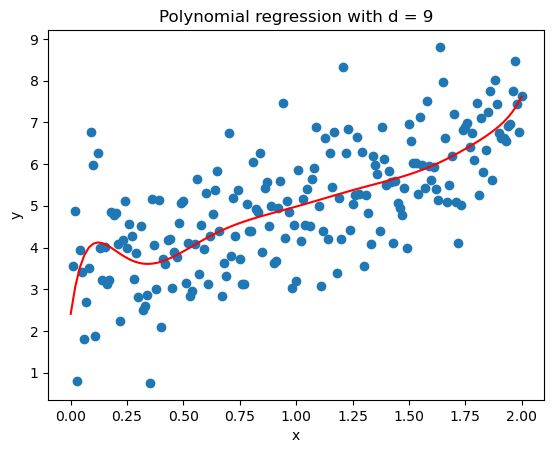

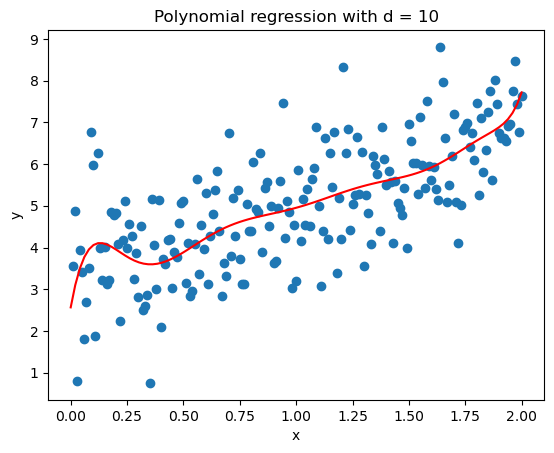

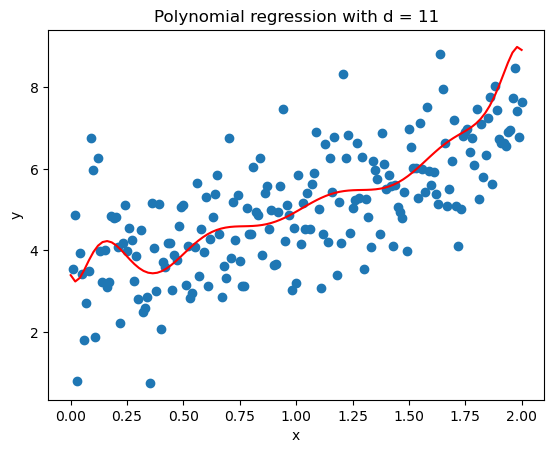

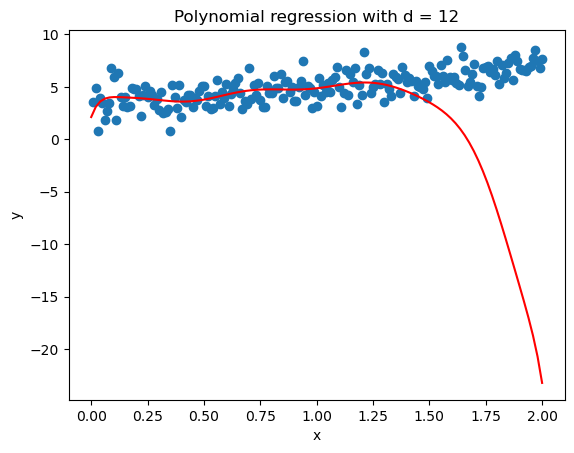

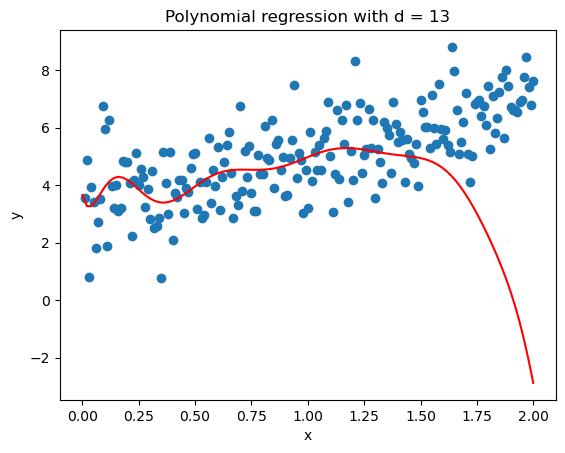

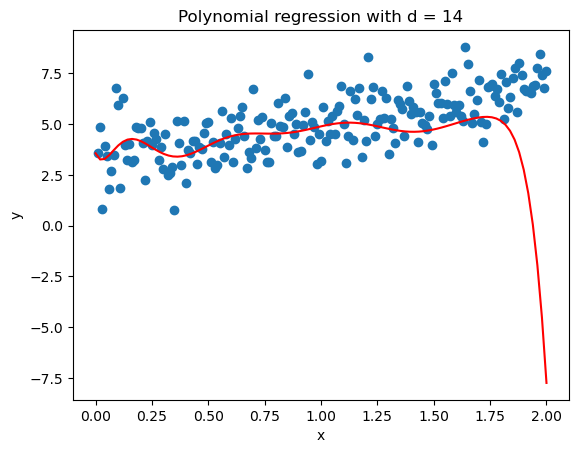

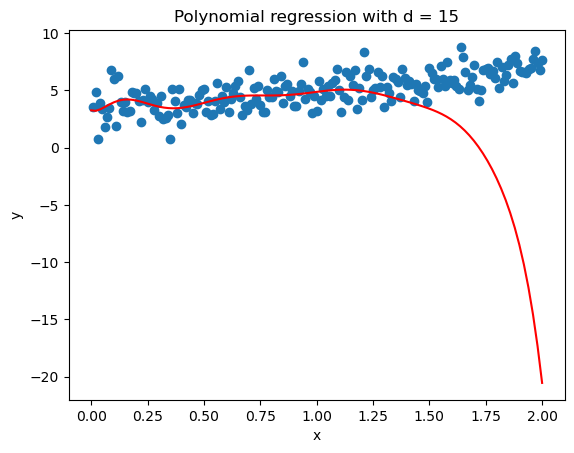

In [21]:
x, y, x_raw = load_data("HW1_data (Spring2023)/3/hw1x.dat", "HW1_data (Spring2023)/3/hw1y.dat")

for d in range(2, 16):
    print(f"Polynomial regression with d = {d}")
    theta, x_d = PolyRegress(x_raw, y, d)
    error = training_error(x_d, y, theta)
    print(f"Training error: {error}\n")

    # Plot the graphs
    plot(x_raw, y, theta, d, 0, 2, f"Polynomial regression with d = {d}")

# Q4

In [41]:
def load_data_tv(input_file, output_file, training_count):
    tx, vx, ty, vy = [], [], [], []
    i, j = 0, 0
    for line in open(input_file, "r").readlines():
        data = line.strip().split(",")
        if len(data) == 4:
            for k in range(len(data)):
                data[k] = float(data[k])
            if i < training_count:
                tx.append(data)
                i += 1
            else:
                vx.append(data)
                
    
    for line in open(output_file, "r").readlines():
        if line != "":
            data = float(line)
            if j < training_count:
                ty.append(data)
                j += 1
            else:
                vy.append(data)
    
    return np.array(tx), np.array(vx), np.array(ty), np.array(vy)

In [45]:
def ridgeregression(tX, tY, l):
    I = np.identity(tX[0].size)
    nlI = tX.size * l * I
    xtx = tX.transpose() @ tX
    temp = np.linalg.inv(nlI + xtx)
    xty = tX.transpose() @ tY
    return temp @ xty

### (a)

In [46]:
tX, vX, tY, vY = load_data_tv("HW1_data (Spring2023)/4/hw1_ridge_x.dat", "HW1_data (Spring2023)/4/hw1_ridge_y.dat", 40)
theta = ridgeregression(tX, tY, 0.25)
print(f"Theta: {theta}")

Theta: [-0.39897404  0.63807925 -0.01029923 -0.89998319]


### (b)

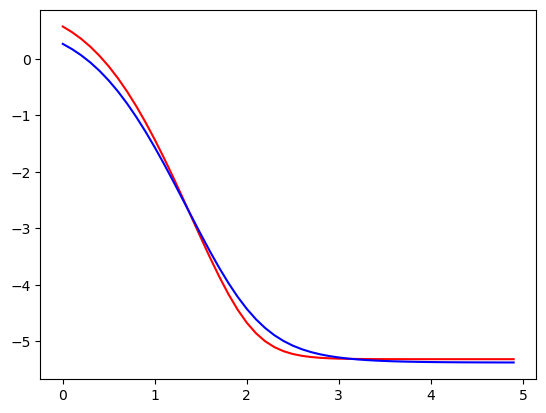

In [52]:
tn = tX.shape[0]
vn = vX.shape[0]

tloss = []
vloss = []
index = np.arange(0, 5, 0.1)

for	i in index:
    w =  ridgeregression(tX, tY, 10**-i)
    tloss = tloss + [np.sum((np.dot(tX, w) - tY)**2)/tn/2]
    vloss = vloss + [np.sum((np.dot(vX, w) - vY)**2)/vn/2]
plt.plot(index, np.log(tloss), 'r')
plt.plot(index, np.log(vloss), 'b')